#Uploading the dataset files 

In [ ]:
from google.colab import files
train = files.upload()
test = files.upload()

Saving segmentation_test.csv to segmentation_test (1).csv


Saving segmentation_train.csv to segmentation_train (1).csv


#Creating DataFrame for Train and Test Data

In [ ]:
import io
import pandas as pd
train_data = pd.read_csv(io.BytesIO(train['segmentation_train.csv']))
test_data = pd.read_csv(io.BytesIO(test['segmentation_test.csv']))

#Showing top 5 data from training dataset

In [ ]:
train_data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Unnamed: 19
0,GRASS,110,189,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86,187,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225,244,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47,232,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97,186,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


##Showing top 5 data from testing dataset

In [ ]:
test_data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Unnamed: 19
0,BRICKFACE,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


#Extracting column names

In [ ]:
col_names=train_data.columns
print(col_names)

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN',
       'Unnamed: 19'],
      dtype='object')


#Seperating Target data from training and testing data

In [ ]:
y_train=train_data[col_names[0]]
x_train=train_data[col_names[1:]]
y_test=test_data[col_names[0]]
x_test=test_data[col_names[1:]]
print('x_train shape as:',x_train.shape,'x_test shape as:',x_test.shape)
print('y_train shape as:',y_train.shape,'y_test shape as:',y_test.shape)

x_train shape as: (2100, 19) x_test shape as: (210, 19)
y_train shape as: (2100,) y_test shape as: (210,)


#Extracting unique Target values

In [ ]:
import numpy as np
target_names=np.unique(y_train)
print(target_names)

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']


#Encoding Target using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
print(np.unique(y_test))

[0 1 2 3 4 5 6]


#Importing RadomForestClassifier for data classification and Fitting data and Predicting output Using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1=classifier.predict(x_train)

#Showing Confusion matrix and Classification report with traning nad testing accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred1))

Confusion Matrix:
 [[30  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Accuracy on testing data: 1.00
Accuracy on training data: 1.00


#Plotting Graph between predicted output and actual output

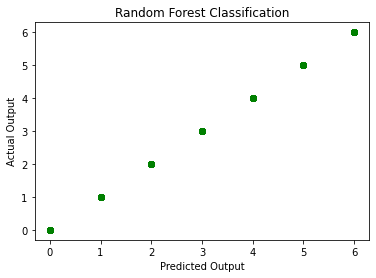

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_pred,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Random Forest Classification")
plt.show()

#Scaling the given data for improvising accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

#Applying Perceptron on Scaled Data and visualizing changes

Confusion Matrix:
 [[29  0  0  0  0  0  1]
 [ 0 23  0  0  0  0  7]
 [ 0  2 25  0  0  0  3]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0  4  0  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.92      0.77      0.84        30
           2       0.86      0.83      0.85        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.70      0.87      0.78        30

    accuracy                           0.92       210
   macro avg       0.93      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210

Accuracy on testing data: 0.92
Accuracy on training data: 0.92


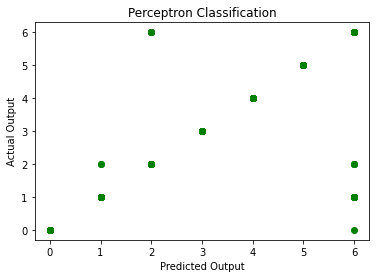

In [ ]:
from sklearn.linear_model import Perceptron
pc=Perceptron()
pc.fit(x_train_sc, y_train)
y_pred_perc=pc.predict(x_test_sc)
y_pred_perc1=pc.predict(x_train_sc)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_perc))
print("Classification Report:\n",classification_report(y_test, y_pred_perc))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred_perc))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred_perc1))
plt.scatter(y_pred_perc,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Perceptron Classification")
plt.show()

#Applying Logistic Regression on Scaled Data and visualizing changes

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix:
 [[29  0  0  0  0  0  1]
 [ 0 26  0  0  0  0  4]
 [ 0  3 23  0  0  0  4]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  2  3  0  0  0 25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.84      0.87      0.85        30
           2       0.88      0.77      0.82        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.74      0.83      0.78        30

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210

Accuracy on testing data: 0.92
Accuracy on training data: 0.94


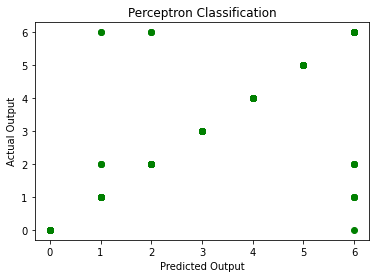

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)
y_pred_lr=lr.predict(x_test_sc)
y_pred_lr1=lr.predict(x_train_sc)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n",classification_report(y_test, y_pred_lr))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred_lr))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred_lr1))
plt.scatter(y_pred_lr,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Perceptron Classification")
plt.show()

#Applying Support vector Classifier on Scaled Data and visualizing changes

Confusion Matrix:
 [[29  0  0  0  0  0  1]
 [ 0 28  0  0  0  0  2]
 [ 0  1 29  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  2  4  0  0  0 24]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.90      0.93      0.92        30
           2       0.88      0.97      0.92        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.89      0.80      0.84        30

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Accuracy on testing data: 0.95
Accuracy on training data: 0.95


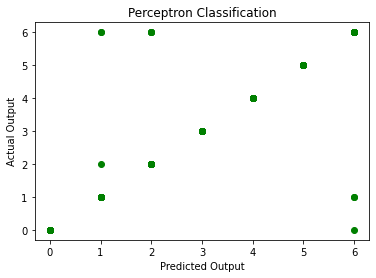

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_sc, y_train)
y_pred_svc=svc.predict(x_test_sc)
y_pred_svc1=svc.predict(x_train_sc)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n",classification_report(y_test, y_pred_svc))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred_svc))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred_svc1))
plt.scatter(y_pred_svc,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Perceptron Classification")
plt.show()

#Applying Voting Classifier for Scaled Data and visualizing changes

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix:
 [[29  0  0  0  0  0  1]
 [ 0 26  0  0  0  0  4]
 [ 0  3 25  0  0  0  2]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  1  3  0  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.87      0.87      0.87        30
           2       0.89      0.83      0.86        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.79      0.87      0.83        30

    accuracy                           0.93       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.93      0.93       210

Accuracy on testing data: 0.93
Accuracy on training data: 0.95


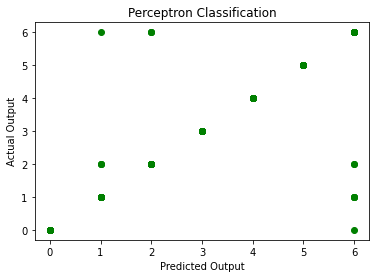

In [ ]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('pc', pc),('lr', lr),('svc',svc)])
vc.fit(x_train_sc, y_train)
y_pred_vc=vc.predict(x_test_sc)
y_pred_vc1=vc.predict(x_train_sc)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_vc))
print("Classification Report:\n",classification_report(y_test, y_pred_vc))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred_vc))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred_vc1))
plt.scatter(y_pred_vc,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Perceptron Classification")
plt.show()

#Applying Bagging Classifier for Scaled Data and visualizing changes

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix:
 [[29  0  0  0  0  0  1]
 [ 0 27  0  0  0  0  3]
 [ 0  3 24  0  0  0  3]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  2  3  0  0  0 25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.84      0.90      0.87        30
           2       0.89      0.80      0.84        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.78      0.83      0.81        30

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210

Accuracy on testing data: 0.93
Accuracy on training data: 0.94


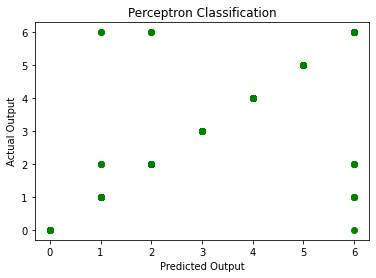

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(n_estimators=10, base_estimator=lr)
bag.fit(x_train_sc, y_train)
y_pred_bag=bag.predict(x_test_sc)
y_pred_bag1=bag.predict(x_train_sc)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_bag))
print("Classification Report:\n",classification_report(y_test, y_pred_bag))
print("Accuracy on testing data: %.2f"%accuracy_score(y_test,y_pred_bag))
print("Accuracy on training data: %.2f"%accuracy_score(y_train,y_pred_bag1))
plt.scatter(y_pred_bag,y_test,c='green')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.title("Perceptron Classification")
plt.show()